In [1]:
import re
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
from sklearn.metrics import f1_score

In [2]:
# Read the content of "Inferno" or any book passage
with open("output.txt", "r", encoding="utf-8") as file:
    text = file.read()

In [3]:
cleaned_text = re.sub(r'\b(Chapter [IVXLCDM]+|Chapter [0-9]+|Figure [0-9]+)\b', '', text)

In [4]:
bookNER = set()
for sent in nltk.sent_tokenize(cleaned_text):
    for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
        if hasattr(chunk, 'label'):
            bookNER.add((' '.join(c[0] for c in chunk), chunk.label()))

bookNER

{('VIA', 'ORGANIZATION'),
 ('Firenze', 'PERSON'),
 ('Field', 'GPE'),
 ('Carnevale', 'ORGANIZATION'),
 ('Solublon', 'PERSON'),
 ('Borges', 'GPE'),
 ('Tonight', 'GPE'),
 ('See', 'PERSON'),
 ('Philippines', 'ORGANIZATION'),
 ('RNA', 'ORGANIZATION'),
 ('Sorry', 'PERSON'),
 ('U.S.', 'GPE'),
 ('NO', 'ORGANIZATION'),
 ('Magic', 'GPE'),
 ('Amitriptyline', 'PERSON'),
 ('Brooks', 'GPE'),
 ('Pitti', 'ORGANIZATION'),
 ('Gypsy', 'PERSON'),
 ('Part', 'ORGANIZATION'),
 ('Hecate', 'GPE'),
 ('Keep Grandma', 'PERSON'),
 ('Don', 'PERSON'),
 ('Seven Towers', 'ORGANIZATION'),
 ('La', 'PERSON'),
 ('Neither', 'PERSON'),
 ('Palazzo Vecchio', 'GPE'),
 ('Death', 'PERSON'),
 ('New Mexico', 'GPE'),
 ('Signorina', 'PERSON'),
 ('FS', 'ORGANIZATION'),
 ('Cerchi', 'GPE'),
 ('Art', 'GPE'),
 ('George Abraham', 'PERSON'),
 ('Washington', 'GPE'),
 ('Horses', 'ORGANIZATION'),
 ('SEEK AND', 'ORGANIZATION'),
 ('PARENTS', 'ORGANIZATION'),
 ('Bartolo', 'PERSON'),
 ('Longfellow', 'PERSON'),
 ('Puck', 'GPE'),
 ('Spectacular Gem

To evaluate the performance of a Named Entity Recognition (NER) system, we'll be selecting specific excerpts from the book. By running NER on these chosen passages, we can measure accuracy and F-value, essential metrics that showcase how well the system identifies entities. This method allows us to assess the system's effectiveness within different contexts and types of text found in the book.

In [5]:
passage_1 = "LANGDON FELT FIRM hands lifting him now … urging him from his delirium, helping him out ofthe taxi. The pavement felt cold beneath his bare feet.Half supported by the slender frame of Dr. Brooks, Langdon staggered down a desertedwalkway between two apartment buildings. The dawn air rustled, billowing his hospitalgown, and Langdon felt cold air in places he knew he shouldn’t.The sedative he’d been given in the hospital had left his mind as blurred as his vision.Langdon felt like he was underwater, attempting to claw his way through a viscous, dimlylit world. Sienna Brooks dragged him onward, supporting him with surprising strength.“Stairs,” she said, and Langdon realized they had reached a side entrance of thebuilding.Langdon gripped the railing and trudged dizzily upward, one step at a time. His bodyfelt ponderous. Dr. Brooks physically pushed him now. When they reached the landing,she typed some numbers into a rusted old keypad and the door buzzed open.The air inside was not much warmer, but the tile floors felt like soft carpet on the solesof his feet compared to the rough pavement outside. Dr. Brooks led Langdon to a tinyelevator and yanked open a folding door, herding Langdon into a cubicle that was aboutthe size of a phone booth. The air inside smelled of MS cigarettes—a bittersweetfragrance as ubiquitous in Italy as the aroma of fresh espresso. Ever so slightly, the smellhelped clear Langdon’s mind. Dr. Brooks pressed a button, and somewhere high abovethem, a series of tired gears clunked and whirred into motion.Upward …The creaky carriage shimmied and vibrated as it began its ascent. Because the wallswere nothing but metal screens, Langdon found himself watching the inside of theelevator shaft slide rhythmically past them. Even in his semiconscious state, Langdon’slifelong fear of cramped spaces was alive and well.Don’t look.He leaned on the wall, trying to catch his breath. His forearm ached, and when helooked down, he saw that the sleeve of his Harris Tweed had been tied awkwardlyaround his arm like a bandage. The remainder of the jacket was dragging behind him onthe ground, frayed and filthy.He closed his eyes against his pounding headache, but the blackness engulfed himagain.A familiar vision materialized—the statuesque, veiled woman with the amulet andsilver hair in ringlets. As before, she was on the banks of a bloodred river and surroundedby writhing bodies. She spoke to Langdon, her voice pleading. Seek and ye shall find!Langdon was overcome with the feeling that he had to save her … save them all. Thehalf-buried, upside-down legs were falling limp … one by one.Who are you!? he called out in silence. What do you want?!Her luxuriant silver hair began fluttering in a hot wind. Our time grows short, shewhispered, touching her amulet necklace. Then, without warning, she erupted in ablinding pillar of fire, which billowed across the river, engulfing them both.Langdon shouted, his eyes flying open.Dr. Brooks eyed him with concern. “What is it?”“I keep hallucinating!” Langdon exclaimed. “The same scene.”“The silver-haired woman? And all the dead bodies?”Langdon nodded, perspiration beading on his brow.“You’ll be okay,” she assured him, despite sounding shaky herself. “Recurring visionsare common with amnesia. The brain function that sorts and catalogs your memories hasbeen temporarily shaken up, and so it throws everything into one picture.”“Not a very nice picture,” he managed.“I know, but until you heal, your memories will be muddled and uncataloged—past,present, and imagination all mixed together. The same thing happens in dreams.”The elevator lurched to a stop, and Dr. Brooks yanked open the folding door. Theywere walking again, this time down a dark, narrow corridor. They passed a window,outside of which the murky silhouettes of Florence rooftops had begun emerging in thepredawn light. At the far end of the hall, she crouched down and retrieved a key frombeneath a thirsty-looking houseplant and unlocked a door.The apartment was tiny, the air inside hinting at an ongoing battle between a vanilla-scented candle and old carpeting. The furniture and artwork were meager at best—as ifshe had furnished it at a yard sale. Dr. Brooks adjusted a thermostat, and the radiatorsbanged to life.She stood a moment and closed her eyes, exhaling heavily, as if to collect herself. Thenshe turned and helped Langdon into a modest kitchenette whose Formica table had twoflimsy chairs.Langdon made a move toward a chair in hopes of sitting down, but Dr. Brooks grabbedhis arm with one hand and opened a cabinet with her other. The cabinet was nearly bare… crackers, a few bags of pasta, a can of Coke, and a bottle of NoDoz.She took out the bottle and dumped six caplets into Langdon’s palm. “Caffeine,” shesaid. “For when I work night shifts like tonight.”Langdon put the pills in his mouth and glanced around for some water.“Chew them,” she said. “They’ll hit your system faster and help counteract thesedative.”Langdon began chewing and instantly cringed. The pills were bitter, clearly meant tobe swallowed whole. Dr. Brooks opened the refrigerator and handed Langdon a half-empty bottle of San Pellegrino. He gratefully took a long drink.The ponytailed doctor now took his right arm and removed the makeshift bandage thatshe’d fashioned out of his jacket, which she laid on the kitchen table. Then she carefullyexamined his wound. As she held his bare arm, Langdon could feel her slender handstrembling“You’ll live,” she announced.Langdon hoped she was going to be okay. He could barely fathom what they’d bothjust endured. “Dr. Brooks,” he said, “we need to call somebody. The consulate … thepolice. Somebody.”She nodded in agreement. “Also, you can stop calling me Dr. Brooks—my name isSienna.”Langdon nodded. “Thanks. I’m Robert.” It seemed the bond they’d just forged fleeingfor their lives warranted a first-name basis. “You said you’re British?”“By birth, yes.”“I don’t hear an accent.”“Good,” she replied. “I worked hard to lose it.”Langdon was about to inquire why, but Sienna motioned for him to follow. She led himdown a narrow corridor to a small, gloomy bathroom. In the mirror above the sink,Langdon glimpsed his reflection for the first time since seeing it in the window of hishospital room.Not good. Langdon’s thick dark hair was matted, and his eyes looked bloodshot andweary. A shroud of stubble obscured his jaw.Sienna turned on the faucet and guided Langdon’s injured forearm under the ice-coldwater. It stung sharply, but he held it there, wincing.Sienna retrieved a fresh washcloth and squirted it with antibacterial soap. “You maywant to look away.”“It’s fine. I’m not bothered by—”Sienna began scrubbing violently, and white-hot pain shot up Langdon’s arm. Heclenched his jaw to prevent himself from shouting out in protest.“You don’t want an infection,” she said, scrubbing harder now. “Besides, if you’re goingto call the authorities, you’ll want to be more alert than you are now. Nothing activatesadrenaline production like pain.”Langdon held on for what felt like a full ten seconds of scrubbing before he forcefullyyanked his arm away. Enough! Admittedly, he felt stronger and more awake; the pain his arm had now entirely overshadowed his headache.“Good,” she said, turning off the water and patting his arm dry with a clean towel.Sienna then applied a small bandage to his forearm, but as she did so, Langdon foundhimself distracted by something he had just noticed—something deeply upsetting to him.For nearly four decades, Langdon had worn an antique collector’s edition Mickey Moustimepiece, a gift from his parents. Mickey’s smiling face and wildly waving arms hadalways served as his daily reminder to smile more often and take life a little lessseriously.“My … watch,” Langdon stammered. “It’s gone!” Without it, he felt suddenlyincomplete. “Was I wearing it when I arrived at the hospital?”Sienna shot him an incredulous look, clearly mystified that he could be worried aboutsuch a trivial thing. “I don’t remember any watch. Just clean yourself up. I’ll be back in afew minutes and we’ll figure out how to get you some help.” She turned to go, butpaused in the doorway, locking eyes with him in the mirror. “And while I’m gone, Isuggest you think very hard about why someone would want to kill you. I imagine it’s thefirst question the authorities will ask.”“Wait, where are you going?”“You can’t talk to the police half naked. I’m going to find you some clothes. Myneighbor is about your size. He’s away, and I’m feeding his cat. He owes me.”With that, Sienna was gone.Robert Langdon turned back to the tiny mirror over the sink and barely recognized theperson staring back at him. Someone wants me dead. In his mind, he again heard therecording of his own delirious mumblings.Very sorry. Very sorry.He probed his memory for some recollection … anything at all. He saw only emptiness.All Langdon knew was that he was in Florence, having suffered a bullet wound to thehead.As Langdon stared into his own weary eyes, he half wondered if he might at anymoment wake up in his reading chair at home, clutching an empty martini glass and acopy of Dead Souls, only to remind himself that Bombay Sapphire and Gogol should never"

passage_2 = "I’M IN FLORENCE!? Robert Langdon’s head throbbed. He was now seated upright in his hospital bed,repeatedly jamming his finger into the call button. Despite the sedatives in his system,his heart was racing.Dr. Brooks hurried back in, her ponytail bobbing. “Are you okay?”Langdon shook his head in bewilderment. “I’m in … Italy!?”“Good,” she said. “You’re remembering.”“No!” Langdon pointed out the window at the commanding edifice in the distance. “Irecognize the Palazzo Vecchio.”Dr. Brooks flicked the lights back on, and the Florence skyline disappeared. She cameto his bedside, whispering calmly. “Mr. Langdon, there’s no need to worry. You’resuffering from mild amnesia, but Dr. Marconi confirmed that your brain function is fine.”The bearded doctor rushed in as well, apparently hearing the call button. He checkedLangdon’s heart monitor as the young doctor spoke to him in rapid, fluent Italian—something about how Langdon was “agitato” to learn he was in Italy.Agitated? Langdon thought angrily. More like stupefied! The adrenaline surging throughhis system was now doing battle with the sedatives. “What happened to me?” hedemanded. “What day is it?!”“Everything is fine,” she said. “It’s early morning. Monday, March eighteenth.”Monday. Langdon forced his aching mind to reel back to the last images he could recall—cold and dark—walking alone across the Harvard campus to a Saturday-night lectureseries. That was two days ago?! A sharper panic now gripped him as he tried to recallanything at all from the lecture or afterward. Nothing. The ping of his heart monitoraccelerated.The older doctor scratched at his beard and continued adjusting equipment while Dr.Brooks sat again beside Langdon.“You’re going to be okay,” she reassured him, speaking gently. “We’ve diagnosed youwith retrograde amnesia, which is very common in head trauma. Your memories of thepast few days may be muddled or missing, but you should suffer no permanent damage.”She paused. “Do you remember my first name? I told you when I walked in.”Langdon thought a moment. “Sienna.” Dr. Sienna Brooks.She smiled. “See? You’re already forming new memories.”The pain in Langdon’s head was almost unbearable, and his near-field vision remainedblurry. “What … happened? How did I get here?”“I think you should rest, and maybe—”“How did I get here?!” he demanded, his heart monitor accelerating further.“Okay, just breathe easy,” Dr. Brooks said, exchanging a nervous look with hercolleague. “I’ll tell you.” Her voice turned markedly more serious. “Mr. Langdon, threehours ago, you staggered into our emergency room, bleeding from a head wound, andyou immediately collapsed. Nobody had any idea who you were or how you got here. Youwere mumbling in English, so Dr. Marconi asked me to assist. I’m on sabbatical here fromthe U.K.”Langdon felt like he had awoken inside a Max Ernst painting. What the hell am I doingin Italy? Normally Langdon came here every other June for an art conference, but thiswas March.The sedatives pulled harder at him now, and he felt as if earth’s gravity were growingstronger by the second, trying to drag him down through his mattress. Langdon fought it,hoisting his head, trying to stay alert.Dr. Brooks leaned over him, hovering like an angel. “Please, Mr. Langdon,” shewhispered. “Head trauma is delicate in the first twenty-four hours. You need to rest, oryou could do serious damage.”A voice crackled suddenly on the room’s intercom. “Dr. Marconi?”The bearded doctor touched a button on the wall and replied, “Sì?”The voice on the intercom spoke in rapid Italian. Langdon didn’t catch what it said, buthe did catch the two doctors exchanging a look of surprise. Or is it alarm?“Momento,” Marconi replied, ending the conversation.“What’s going on?” Langdon asked.Dr. Brooks’s eyes seemed to narrow a bit. “That was the ICU receptionist. Someone’shere to visit you.”A ray of hope cut through Langdon’s grogginess. “That’s good news! Maybe this personknows what happened to me.”She looked uncertain. “It’s just odd that someone’s here. We didn’t have your name,and you’re not even registered in the system yet.”Langdon battled the sedatives and awkwardly hoisted himself upright in his bed. “Ifsomeone knows I’m here, that person must know what happened!”Dr. Brooks glanced at Dr. Marconi, who immediately shook his head and tapped hiswatch. She turned back to Langdon.“This is the ICU,” she explained. “Nobody is allowed in until nine A.M. at the earliest. Ina moment Dr. Marconi will go out and see who the visitor is and what he or she wants.”“What about what I want?” Langdon demanded.Dr. Brooks smiled patiently and lowered her voice, leaning closer. “Mr. Langdon, thereare some things you don’t know about last night … about what happened to you. Andbefore you speak to anyone, I think it’s only fair that you have all the facts.Unfortunately, I don’t think you’re strong enough yet to—”“What facts!?” Langdon demanded, struggling to prop himself higher. The IV in his armpinched, and his body felt like it weighed several hundred pounds. “All I know is I’m in aFlorence hospital and I arrived repeating the words ‘very sorry …’ ”A frightening thought now occurred to him.“Was I responsible for a car accident?” Langdon asked. “Did I hurt someone?!”“No, no,” she said. “I don’t believe so.”“Then what?” Langdon insisted, eyeing both doctors furiously. “I have a right to knowwhat’s going on!”There was a long silence, and Dr. Marconi finally gave his attractive young colleague areluctant nod. Dr. Brooks exhaled and moved closer to his bedside. “Okay, let me tell youwhat I know … and you’ll listen calmly, agreed?”Langdon nodded, the head movement sending a jolt of pain radiating through his skull.He ignored it, eager for answers.“The first thing is this … Your head wound was not caused by an accident.”“Well, that’s a relief.”“Not really. Your wound, in fact, was caused by a bullet.”Langdon’s heart monitor pinged faster. “I beg your pardon!?”Dr. Brooks spoke steadily but quickly. “A bullet grazed the top of your skull and mostlikely gave you a concussion. You’re very lucky to be alive. An inch lower, and …” Sheshook her head.Langdon stared at her in disbelief. Someone shot me?Angry voices erupted in the hall as an argument broke out. It sounded as if whoeverhad arrived to visit Langdon did not want to wait. Almost immediately, Langdon heard aheavy door at the far end of the hallway burst open. He watched until he saw a figureapproaching down the corridor.The woman was dressed entirely in black leather. She was toned and strong with dark,spiked hair. She moved effortlessly, as if her feet weren’t touching the ground, and shewas headed directly for Langdon’s room.Without hesitation, Dr. Marconi stepped into the open doorway to block the visitor’spassage. “Ferma!” the man commanded, holding out his palm like a policeman.The stranger, without breaking stride, produced a silenced handgun. She aimed directlyat Dr. Marconi’s chest and fired.There was a staccato hiss.Langdon watched in horror as Dr. Marconi staggered backward into the room, falling tothe floor, clutching his chest, his white lab coat drenched in blood."

passage_3 = "Snaking through heavy crowds on the Riva degli Schiavoni, Langdon, Sienna, and Ferris hugged the water’s edge, making their way into St. Mark’s Square and arriving at its southernmost border, the edge where the piazza met the sea. Here the throng of tourists was almost impenetrable, creating a claustrophobic crush around Langdon as the multitudes gravitated over to photograph the two massive columns that stood here, framing the square. The official gateway to the city, Langdon thought ironically, knowing the spot had also been used for public executions until as late as the eighteenth century. Atop one of the gateway’s columns, he could see a bizarre statue of St. Theodore, posing proudly with his slain dragon of legendary repute, which always looked to Langdon much more like a crocodile. Atop the second column stood the ubiquitous symbol of Venice—the winged lion. Throughout the city, the winged lion could be seen with his paw resting proudly on an open book bearing the Latin inscription Pax tibi Marce, evangelista meus (May Peace Be with You, Mark, My Evangelist). According to legend, these words were spoken by an angel upon St. Mark’s arrival in Venice, along with the prediction that his body would one day rest here. This apocryphal legend was later used by Venetians to justify plundering St. Mark’s bones from Alexandria for reburial in St. Mark’s Basilica. To this day, the winged lion endures as the city’s symbol and is visible at nearly every turn. Langdon motioned to his right, past the columns, across St. Mark’s Square. “If we get separated, meet at the front door of the basilica.” The others agreed and quickly began skirting the edges of the crowd and following the western wall of the Doge’s Palace into the square. Despite the laws forbidding feeding them, the celebrated pigeons of Venice appeared to be alive and well, some pecking about at the feet of the crowds and others swooping into the outdoor cafés to pillage unprotected bread baskets and torment the tuxedoed waiters. This grand piazza, unlike most in Europe, was shaped not in the form of a square but rather in that of the letter L. The shorter leg—known as the piazzetta—connected the ocean to St. Mark’s Basilica. Up ahead, the square took a ninety-degree left turn into its larger leg, which ran from the basilica toward the Museo Correr. Strangely, rather than being rectilinear, the square was an irregular trapezoid, narrowing substantially at one end. This fun-house-type illusion made the piazza look far longer than it was, an effect that was accentuated by the grid of tiles whose patterns outlined the original stalls of fifteenth-century street merchants. As Langdon continued on toward the elbow of the square, he could see, directly ahead in the distance, the shimmering blue glass dial of the St. Mark’s Clock Tower—the same astronomical clock through which James Bond had thrown a villain in the film Moonraker. It was not until this moment, as he entered the sheltered square, that Langdon could fully appreciate this city’s most unique offering: sound. With virtually no cars or motorized vehicles of any kind, Venice enjoyed a blissful absence of the usual civic traffic, subways, and sirens, leaving sonic space for the distinctly unmechanical tapestry of human voices, cooing pigeons, and lilting violins serenading patrons at the outdoor cafés. Venice sounded like no other metropolitan center in the world. As the late-afternoon sun streamed into St. Mark’s from the west, casting long shadows across the tiled square, Langdon glanced up at the towering spire of the campanile, which rose high over the square and dominated the ancient Venetian skyline. The upper loggia of the tower was packed with hundreds of people. Even the mere thought of being up there made him shiver, and he put his head back down and continued through the sea of humanity. Sienna could easily have kept up with Langdon, but Ferris was lagging behind, and Sienna had decided to split the difference in order to keep both men in sight. Now, however, as the distance between them grew more pronounced, she looked back impatiently. Ferris pointed to his chest, indicating he was winded, and motioned for her to go on ahead. Sienna complied, moving quickly after Langdon and losing sight of Ferris. Yet as she wove her way through the crowd, a nagging feeling held her back—the strange suspicion that Ferris was lagging behind intentionally … as if he were trying to put distance between them. Having learned long ago to trust her instincts, Sienna ducked into an alcove and looked out from the shadows, scanning the crowd behind her and looking for Ferris. Where did he go?! It was as if he were no longer even trying to follow them. Sienna studied the faces in the crowd, and finally she saw him. To her surprise, Ferris had stopped and was crouched low, typing into his phone. The same phone he told me had a dead battery. A visceral fear gripped her, and again she knew she should trust it. He lied to me on the train. As Sienna watched him, she tried to imagine what he was doing. Secretly texting someone? Researching behind her back? Trying to solve the mystery of Zobrist’s poem before Langdon and Sienna could do so? Whatever his rationale, he had blatantly lied to her. I can’t trust him. Sienna wondered if she should storm over and confront him, but she quickly decided to slip back into the crowd before he spotted her. She headed again toward the basilica, searching for Langdon. I’ve got to warn him not to reveal anything else to Ferris. She was only fifty yards from the basilica when she felt a strong hand tugging on her sweater from behind. She spun around and found herself face-to-face with Ferris. The man with the rash was panting heavily, clearly having dashed through the mob to catch up with her. There was a frantic quality about him that Sienna hadn’t seen before. “Sorry,” he said, barely able to breathe. “I got lost in the crowd.” The instant Sienna looked in his eyes, she knew. He’s hiding something. When Langdon arrived in front of St. Mark’s Basilica, he was surprised to discover that his two companions were no longer behind him. Also of surprise to Langdon was the absence of a line of tourists waiting to enter the church. Then again, Langdon realized, this was late afternoon in Venice, the hour when most tourists—their energy flagging from heavy lunches of pasta and wine—decided to stroll the piazzas or sip coffee rather than trying to absorb any more history. Assuming that Sienna and Ferris would be arriving at any moment, Langdon turned his eyes to the entrance of the basilica before him. Sometimes accused of offering “an embarrassing surfeit of ingress,” the building’s lower facade was almost entirely taken up by a phalanx of five recessed entrances whose clustered columns, vaulted archways, and gaping bronze doors arguably made the building, if nothing else, eminently welcoming. One of Europe’s finest specimens of Byzantine architecture, St. Mark’s had a decidedly soft and whimsical appearance. In contrast to the austere gray towers of Notre-Dame or Chartres, St. Mark’s seemed imposing and yet, somehow, far more down-to-earth. Wider than it was tall, the church was topped by five bulging whitewashed domes that exuded an airy, almost festive appearance, causing more than a few of the guidebooks to compare St. Mark’s to a meringue-topped wedding cake. High atop the central peak of the church, a slender statue of St. Mark gazed down into the square that bore his name. His feet rested atop a crested arch that was painted midnight blue and dotted with golden stars. Against this colorful backdrop, the golden winged lion of Venice stood as the shimmering mascot of the city. It was beneath the golden lion, however, that St. Mark’s displayed one of its most famous treasures—four mammoth copper stallions—which at the moment were glinting in the afternoon sun. The Horses of St. Mark’s. Poised as if prepared to leap down at any moment into the square, these four priceless stallions—like so many treasures here in Venice—had been pillaged from Constantinople during the Crusades. Another similarly looted work of art was on display beneath the horses at the southwest corner of the church—a purple porphyry carving known as The Tetrarchs. The statue was well known for its missing foot, broken off while it was being plundered from Constantinople in the thirteenth century. Miraculously, in the 1960s, the foot was unearthed in Istanbul. Venice petitioned for the missing piece of statue, but the Turkish authorities replied with a simple message: You stole the statue—we’re keeping our foot. “Mister, you buy?” a woman’s voice said, drawing Langdon’s gaze downward. A heavyset Gypsy woman was holding up a tall pole on which hung a collection of Venetian masks. Most were in the popular volto intero style—the stylized full-faced, white masks often worn by women during Carnevale. Her collection also contained some playful half-faced Colombina masks, a few triangle-chinned bautas, and a strapless Moretta. Despite her colorful offerings, though, it was a single, grayish-black mask at the top of the pole that seized Langdon’s attention, its menacing dead eyes seeming to stare directly down at him over a long, beaked nose. The plague doctor. Langdon averted his eyes, needing no reminder of what he was doing here in Venice. “You buy?” the Gypsy repeated. Langdon smiled weakly and shook his head. “Sono molto belle, ma no, grazie.” As the woman departed, Langdon’s gaze followed the ominous plague mask as it bobbed above the crowd. He sighed heavily and raised his eyes back to the four copper stallions on the second-floor balcony. In a flash, it hit him. Langdon felt a sudden rush of elements crashing together—Horses of St. Mark’s, Venetian masks, and pillaged treasures from Constantinople. “My God,” he whispered. That’s it!" 

# Passage 1

In [6]:
passage_1 = "LANGDON FELT FIRM hands lifting him now … urging him from his delirium, helping him out ofthe taxi. The pavement felt cold beneath his bare feet.Half supported by the slender frame of Dr. Brooks, Langdon staggered down a desertedwalkway between two apartment buildings. The dawn air rustled, billowing his hospitalgown, and Langdon felt cold air in places he knew he shouldn’t.The sedative he’d been given in the hospital had left his mind as blurred as his vision.Langdon felt like he was underwater, attempting to claw his way through a viscous, dimlylit world. Sienna Brooks dragged him onward, supporting him with surprising strength.“Stairs,” she said, and Langdon realized they had reached a side entrance of thebuilding.Langdon gripped the railing and trudged dizzily upward, one step at a time. His bodyfelt ponderous. Dr. Brooks physically pushed him now. When they reached the landing,she typed some numbers into a rusted old keypad and the door buzzed open.The air inside was not much warmer, but the tile floors felt like soft carpet on the solesof his feet compared to the rough pavement outside. Dr. Brooks led Langdon to a tinyelevator and yanked open a folding door, herding Langdon into a cubicle that was aboutthe size of a phone booth. The air inside smelled of MS cigarettes—a bittersweetfragrance as ubiquitous in Italy as the aroma of fresh espresso. Ever so slightly, the smellhelped clear Langdon’s mind. Dr. Brooks pressed a button, and somewhere high abovethem, a series of tired gears clunked and whirred into motion.Upward …The creaky carriage shimmied and vibrated as it began its ascent. Because the wallswere nothing but metal screens, Langdon found himself watching the inside of theelevator shaft slide rhythmically past them. Even in his semiconscious state, Langdon’slifelong fear of cramped spaces was alive and well.Don’t look.He leaned on the wall, trying to catch his breath. His forearm ached, and when helooked down, he saw that the sleeve of his Harris Tweed had been tied awkwardlyaround his arm like a bandage. The remainder of the jacket was dragging behind him onthe ground, frayed and filthy.He closed his eyes against his pounding headache, but the blackness engulfed himagain.A familiar vision materialized—the statuesque, veiled woman with the amulet andsilver hair in ringlets. As before, she was on the banks of a bloodred river and surroundedby writhing bodies. She spoke to Langdon, her voice pleading. Seek and ye shall find!Langdon was overcome with the feeling that he had to save her … save them all. Thehalf-buried, upside-down legs were falling limp … one by one.Who are you!? he called out in silence. What do you want?!Her luxuriant silver hair began fluttering in a hot wind. Our time grows short, shewhispered, touching her amulet necklace. Then, without warning, she erupted in ablinding pillar of fire, which billowed across the river, engulfing them both.Langdon shouted, his eyes flying open.Dr. Brooks eyed him with concern. “What is it?”“I keep hallucinating!” Langdon exclaimed. “The same scene.”“The silver-haired woman? And all the dead bodies?”Langdon nodded, perspiration beading on his brow.“You’ll be okay,” she assured him, despite sounding shaky herself. “Recurring visionsare common with amnesia. The brain function that sorts and catalogs your memories hasbeen temporarily shaken up, and so it throws everything into one picture.”“Not a very nice picture,” he managed.“I know, but until you heal, your memories will be muddled and uncataloged—past,present, and imagination all mixed together. The same thing happens in dreams.”The elevator lurched to a stop, and Dr. Brooks yanked open the folding door. Theywere walking again, this time down a dark, narrow corridor. They passed a window,outside of which the murky silhouettes of Florence rooftops had begun emerging in thepredawn light. At the far end of the hall, she crouched down and retrieved a key frombeneath a thirsty-looking houseplant and unlocked a door.The apartment was tiny, the air inside hinting at an ongoing battle between a vanilla-scented candle and old carpeting. The furniture and artwork were meager at best—as ifshe had furnished it at a yard sale. Dr. Brooks adjusted a thermostat, and the radiatorsbanged to life.She stood a moment and closed her eyes, exhaling heavily, as if to collect herself. Thenshe turned and helped Langdon into a modest kitchenette whose Formica table had twoflimsy chairs.Langdon made a move toward a chair in hopes of sitting down, but Dr. Brooks grabbedhis arm with one hand and opened a cabinet with her other. The cabinet was nearly bare… crackers, a few bags of pasta, a can of Coke, and a bottle of NoDoz.She took out the bottle and dumped six caplets into Langdon’s palm. “Caffeine,” shesaid. “For when I work night shifts like tonight.”Langdon put the pills in his mouth and glanced around for some water.“Chew them,” she said. “They’ll hit your system faster and help counteract thesedative.”Langdon began chewing and instantly cringed. The pills were bitter, clearly meant tobe swallowed whole. Dr. Brooks opened the refrigerator and handed Langdon a half-empty bottle of San Pellegrino. He gratefully took a long drink.The ponytailed doctor now took his right arm and removed the makeshift bandage thatshe’d fashioned out of his jacket, which she laid on the kitchen table. Then she carefullyexamined his wound. As she held his bare arm, Langdon could feel her slender handstrembling“You’ll live,” she announced.Langdon hoped she was going to be okay. He could barely fathom what they’d bothjust endured. “Dr. Brooks,” he said, “we need to call somebody. The consulate … thepolice. Somebody.”She nodded in agreement. “Also, you can stop calling me Dr. Brooks—my name isSienna.”Langdon nodded. “Thanks. I’m Robert.” It seemed the bond they’d just forged fleeingfor their lives warranted a first-name basis. “You said you’re British?”“By birth, yes.”“I don’t hear an accent.”“Good,” she replied. “I worked hard to lose it.”Langdon was about to inquire why, but Sienna motioned for him to follow. She led himdown a narrow corridor to a small, gloomy bathroom. In the mirror above the sink,Langdon glimpsed his reflection for the first time since seeing it in the window of hishospital room.Not good. Langdon’s thick dark hair was matted, and his eyes looked bloodshot andweary. A shroud of stubble obscured his jaw.Sienna turned on the faucet and guided Langdon’s injured forearm under the ice-coldwater. It stung sharply, but he held it there, wincing.Sienna retrieved a fresh washcloth and squirted it with antibacterial soap. “You maywant to look away.”“It’s fine. I’m not bothered by—”Sienna began scrubbing violently, and white-hot pain shot up Langdon’s arm. Heclenched his jaw to prevent himself from shouting out in protest.“You don’t want an infection,” she said, scrubbing harder now. “Besides, if you’re goingto call the authorities, you’ll want to be more alert than you are now. Nothing activatesadrenaline production like pain.”Langdon held on for what felt like a full ten seconds of scrubbing before he forcefullyyanked his arm away. Enough! Admittedly, he felt stronger and more awake; the pain his arm had now entirely overshadowed his headache.“Good,” she said, turning off the water and patting his arm dry with a clean towel.Sienna then applied a small bandage to his forearm, but as she did so, Langdon foundhimself distracted by something he had just noticed—something deeply upsetting to him.For nearly four decades, Langdon had worn an antique collector’s edition Mickey Moustimepiece, a gift from his parents. Mickey’s smiling face and wildly waving arms hadalways served as his daily reminder to smile more often and take life a little lessseriously.“My … watch,” Langdon stammered. “It’s gone!” Without it, he felt suddenlyincomplete. “Was I wearing it when I arrived at the hospital?”Sienna shot him an incredulous look, clearly mystified that he could be worried aboutsuch a trivial thing. “I don’t remember any watch. Just clean yourself up. I’ll be back in afew minutes and we’ll figure out how to get you some help.” She turned to go, butpaused in the doorway, locking eyes with him in the mirror. “And while I’m gone, Isuggest you think very hard about why someone would want to kill you. I imagine it’s thefirst question the authorities will ask.”“Wait, where are you going?”“You can’t talk to the police half naked. I’m going to find you some clothes. Myneighbor is about your size. He’s away, and I’m feeding his cat. He owes me.”With that, Sienna was gone.Robert Langdon turned back to the tiny mirror over the sink and barely recognized theperson staring back at him. Someone wants me dead. In his mind, he again heard therecording of his own delirious mumblings.Very sorry. Very sorry.He probed his memory for some recollection … anything at all. He saw only emptiness.All Langdon knew was that he was in Florence, having suffered a bullet wound to thehead.As Langdon stared into his own weary eyes, he half wondered if he might at anymoment wake up in his reading chair at home, clutching an empty martini glass and acopy of Dead Souls, only to remind himself that Bombay Sapphire and Gogol should never"


In [7]:
p1_NER = set()
for sent in nltk.sent_tokenize(passage_1):
    for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
        if hasattr(chunk, 'label'):
            p1_NER.add((' '.join(c[0] for c in chunk), chunk.label()))

p1_NER

{('Bombay Sapphire', 'PERSON'),
 ('British', 'GPE'),
 ('Brooks', 'GPE'),
 ('Brooks', 'PERSON'),
 ('Coke', 'GPE'),
 ('Dead Souls', 'ORGANIZATION'),
 ('FELT', 'ORGANIZATION'),
 ('Florence', 'GPE'),
 ('Formica', 'ORGANIZATION'),
 ('Gogol', 'PERSON'),
 ('Good', 'PERSON'),
 ('Harris Tweed', 'PERSON'),
 ('Isuggest', 'PERSON'),
 ('Italy', 'GPE'),
 ('LANGDON', 'ORGANIZATION'),
 ('Langdon', 'GPE'),
 ('Langdon', 'PERSON'),
 ('Mickey', 'PERSON'),
 ('Mickey Moustimepiece', 'PERSON'),
 ('Myneighbor', 'GPE'),
 ('San Pellegrino', 'GPE'),
 ('Seek', 'GPE'),
 ('Sienna', 'PERSON'),
 ('Someone', 'GPE')}

In [8]:
prediction_p1 = dict()
for x in p1_NER:
    prediction_p1.setdefault(x[0], []).append(x[1])

In [9]:
Hand_Marked_p1 =[
    ('Langdon', 'Person'),
    ('Sienna Brooks', 'Person'),
    ('Florence', 'GPE'),
    ('Italy', 'GPE'),
    ('the consulate', 'Organization'),
    ('the police', 'Organization'),
    ('San Pellegrino', 'GPE'),
    ('Brooks', 'Person'),
    ('Harris Tweed', 'PERSON')
    
]

In [10]:
actual_p1 = dict()
for x in Hand_Marked_p1:
    actual_p1.setdefault(x[0], x[1])
# print(actual)

In [11]:
tp, tn, fp, fn = 0, 0, 0, 0

In [12]:
for entity, type_ in actual_p1.items():
    if entity in prediction_p1:
        if type_ in prediction_p1[entity]:
            tp += 1
            fp += len(prediction_p1[entity]) - 1
        else:
            fn += 1
    else:
        fn += 1

In [13]:
print("TP: ", tp, " TN: ", tn, " FP: ", fp, " FN: ", fn)

TP:  4  TN:  0  FP:  0  FN:  5


In [14]:
F1_score_p1 = (2 * tp) / ((2 * tp) + fp + fn)
accuracy = (tp + tn) / (tp + tn + fn + fp)
print("Accuracy: {0:.2f}".format(accuracy))
print("F1 Score: {0:.2f}".format(F1_score_p1))

Accuracy: 0.44
F1 Score: 0.62


In [15]:
precision = tp / (tp + fp)
recall = tp / (tp + fn)


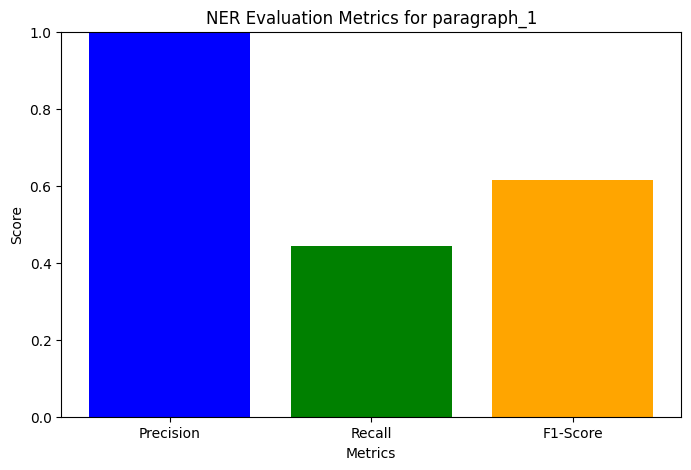

In [16]:
labels = ['Precision', 'Recall', 'F1-Score']
scores = [precision, recall, F1_score_p1]

plt.figure(figsize=(8, 5))
plt.bar(labels, scores, color=['blue', 'green', 'orange'])
plt.ylim(0, 1)  # Setting y-axis limit from 0 to 1 for better visualization of scores
plt.title('NER Evaluation Metrics for paragraph_1')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.show()

# Passage 2

In [17]:
passage_2 = "I’M IN FLORENCE!? Robert Langdon’s head throbbed. He was now seated upright in his hospital bed, repeatedly jamming his finger into the call button. Despite the sedatives in his system, his heart was racing. Dr. Brooks hurried back in, her ponytail bobbing. “Are you okay?” Langdon shook his head in bewilderment. “I’m in Italy!?” “Good,” she said. “You’re remembering.” “No!” Langdon pointed out the window at the commanding edifice in the distance. “I recognize the Palazzo Vecchio.” Dr. Brooks flicked the lights back on, and the Florence skyline disappeared. She came to his bedside, whispering calmly. “Mr. Langdon, there’s no need to worry. You’re suffering from mild amnesia, but Dr. Marconi confirmed that your brain function is fine.” The bearded doctor rushed in as well, apparently hearing the call button. He checked Langdon’s heart monitor as the young doctor spoke to him in rapid, fluent Italian—something about how Langdon was “agitato” to learn he was in Italy. Agitated? Langdon thought angrily. More like stupefied! The adrenaline surging through his system was now doing battle with the sedatives. “What happened to me?” he demanded. “What day is it?!” “Everything is fine,” she said. “It’s early morning. Monday, March eighteenth.” Monday. Langdon forced his aching mind to reel back to the last images he could recall—cold and dark—walking alone across the Harvard campus to a Saturday-night lecture series. That was two days ago?! A sharper panic now gripped him as he tried to recall anything at all from the lecture or afterward. Nothing. The ping of his heart monitor accelerated. The older doctor scratched at his beard and continued adjusting equipment while Dr. Brooks sat again beside Langdon. “You’re going to be okay,” she reassured him, speaking gently. “We’ve diagnosed you with retrograde amnesia, which is very common in head trauma. Your memories of the past few days may be muddled or missing, but you should suffer no permanent damage.” She paused. “Do you remember my first name? I told you when I walked in.” Langdon thought a moment. “Sienna.” Dr. Sienna Brooks. She smiled. “See? You’re already forming new memories.” The pain in Langdon’s head was almost unbearable, and his near-field vision remained blurry. “What happened? How did I get here?” “I think you should rest, and maybe—” “How did I get here?!” he demanded, his heart monitor accelerating further. “Okay, just breathe easy,” Dr. Brooks said, exchanging a nervous look with her colleague. “I’ll tell you.” Her voice turned markedly more serious. “Mr. Langdon, three hours ago, you staggered into our emergency room, bleeding from a head wound, and you immediately collapsed. Nobody had any idea who you were or how you got here. You were mumbling in English, so Dr. Marconi asked me to assist. I’m on sabbatical here from the U.K.” Langdon felt like he had awoken inside a Max Ernst painting. What the hell am I doing in Italy? Normally Langdon came here every other June for an art conference, but this was March. The sedatives pulled harder at him now, and he felt as if earth’s gravity were growing stronger by the second, trying to drag him down through his mattress. Langdon fought it, hoisting his head, trying to stay alert. Dr. Brooks leaned over him, hovering like an angel. “Please, Mr. Langdon,” she whispered. “Head trauma is delicate in the first twenty-four hours. You need to rest, or you could do serious damage.” A voice crackled suddenly on the room’s intercom. “Dr. Marconi?” The bearded doctor touched a button on the wall and replied, “Sì?” The voice on the intercom spoke in rapid Italian. Langdon didn’t catch what it said, but he did catch the two doctors exchanging a look of surprise. Or is it alarm? “Momento,” Marconi replied, ending the conversation. “What’s going on?” Langdon asked. Dr. Brooks’s eyes seemed to narrow a bit. “That was the ICU receptionist. Someone’s here to visit you.” A ray of hope cut through Langdon’s grogginess. “That’s good news! Maybe this person knows what happened to me.” She looked uncertain. “It’s just odd that someone’s here. We didn’t have your name, and you’re not even registered in the system yet.” Langdon battled the sedatives and awkwardly hoisted himself upright in his bed. “If someone knows I’m here, that person must know what happened!” Dr. Brooks glanced at Dr. Marconi, who immediately shook his head and tapped his watch. She turned back to Langdon. “This is the ICU,” she explained. “Nobody is allowed in until nine A.M. at the earliest. In a moment Dr. Marconi will go out and see who the visitor is and what he or she wants.” “What about what I want?” Langdon demanded. Dr. Brooks smiled patiently and lowered her voice, leaning closer. “Mr. Langdon, there are some things you don’t know about last night … about what happened to you. And before you speak to anyone, I think it’s only fair that you have all the facts. Unfortunately, I don’t think you’re strong enough yet to—” “What facts!?” Langdon demanded, struggling to prop himself higher. The IV in his arm pinched, and his body felt like it weighed several hundred pounds. “All I know is I’m in a Florence hospital and I arrived repeating the words ‘very sorry …’ ” A frightening thought now occurred to him. “Was I responsible for a car accident?” Langdon asked. “Did I hurt someone?!” “No, no,” she said. “I don’t believe so.” “Then what?” Langdon insisted, eyeing both doctors furiously. “I have a right to know what’s going on!” There was a long silence, and Dr. Marconi finally gave his attractive young colleague a reluctant nod. Dr. Brooks exhaled and moved closer to his bedside. “Okay, let me tell you what I know … and you’ll listen calmly, agreed?” Langdon nodded, the head movement sending a jolt of pain radiating through his skull. He ignored it, eager for answers. “The first thing is this … Your head wound was not caused by an accident.” “Well, that’s a relief.” “Not really. Your wound, in fact, was caused by a bullet.” Langdon’s heart monitor pinged faster. “I beg your pardon!?” Dr. Brooks spoke steadily but quickly. “A bullet grazed the top of your skull and most likely gave you a concussion. You’re very lucky to be alive. An inch lower, and …” She shook her head. Langdon stared at her in disbelief. Someone shot me? Angry voices erupted in the hall as an argument broke out. It sounded as if whoever had arrived to visit Langdon did not want to wait. Almost immediately, Langdon heard a heavy door at the far end of the hallway burst open. He watched until he saw a figure approaching down the corridor.The woman was dressed entirely in black leather. She was toned and strong with dark, spiked hair. She moved effortlessly, as if her feet weren’t touching the ground, and shewas headed directly for Langdon’s room. Without hesitation, Dr. Marconi stepped into the open doorway to block the visitor’s passage. “Ferma!” the man commanded, holding out his palm like a policeman.The stranger, without breaking stride, produced a silenced handgun. She aimed directly at Dr. Marconi’s chest and fired. There was a staccato hiss. Langdon watched in horror as Dr. Marconi staggered backward into the room, falling to the floor, clutching his chest, his white lab coat drenched in blood."



In [18]:
p2_NER = set()
for sent in nltk.sent_tokenize(passage_2):
    for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
        if hasattr(chunk, 'label'):
            p2_NER.add((' '.join(c[0] for c in chunk), chunk.label()))

p2_NER

{('Angry', 'GPE'),
 ('Brooks', 'PERSON'),
 ('English', 'GPE'),
 ('Florence', 'GPE'),
 ('Good', 'PERSON'),
 ('Harvard', 'ORGANIZATION'),
 ('ICU', 'ORGANIZATION'),
 ('Italian', 'GPE'),
 ('Italy', 'GPE'),
 ('Langdon', 'GPE'),
 ('Langdon', 'PERSON'),
 ('March', 'PERSON'),
 ('Marconi', 'PERSON'),
 ('Max Ernst', 'ORGANIZATION'),
 ('Momento', 'ORGANIZATION'),
 ('Mr. Langdon', 'PERSON'),
 ('No', 'ORGANIZATION'),
 ('Nobody', 'GPE'),
 ('Nothing', 'GPE'),
 ('Okay', 'PERSON'),
 ('Palazzo', 'ORGANIZATION'),
 ('Robert', 'PERSON'),
 ('See', 'PERSON'),
 ('Sienna Brooks', 'PERSON'),
 ('Someone', 'PERSON')}

In [19]:
prediction_p2 = dict()
for x in p2_NER:
    prediction_p2.setdefault(x[0], []).append(x[1])

In [20]:
Hand_Marked_p2 = [
    ('Robert', 'PERSON'),
    ('Langdon','PERSON'),
    ('Brooks', 'PERSON'),
    ('Marconi', 'PERSON'),
    ('Max Ernst', 'PERSON'),
    ('Sienna Brooks', 'PERSON'),
    ('Vayentha', 'PERSON'),
    ('The Mendacium', 'ORGANIZATION'),
    ('Consortium', 'ORGANIZATION'),
    ('Palazzo Vecchio', 'GPE'),
    ('Harvard campus', 'GPE'),
    ('Florence', 'GPE'),
    ('Italy', 'GPE'),
    ('U.K.', 'GPE'),
    ('Mr. Langdon', 'PERSON'),
    ('ICU', 'ORGANIZATION'),
    ('Adriatic', 'GPE'),
    ('Monday, March eighteenth', 'DATE'),
    ('every other June', 'DATE')
]


In [21]:
actual_p2 = dict()
for x in Hand_Marked_p2:
    actual_p2.setdefault(x[0], x[1])
# print(actual)

In [22]:
tp, tn, fp, fn = 0, 0, 0, 0

In [23]:
for entity, type_ in actual_p2.items():
    if entity in prediction_p2:
        if type_ in prediction_p2[entity]:
            tp += 1
            fp += len(prediction_p2[entity]) - 1
        else:
            fn += 1
    else:
        fn += 1

In [24]:
print("TP: ", tp, " TN: ", tn, " FP: ", fp, " FN: ", fn)

TP:  9  TN:  0  FP:  1  FN:  10


In [25]:
F1_score_p2 = (2 * tp) / ((2 * tp) + fp + fn)
accuracy = (tp + tn) / (tp + tn + fn + fp)
print("Accuracy: {0:.2f}".format(accuracy))
print("F1 Score: {0:.2f}".format(F1_score_p2))

Accuracy: 0.45
F1 Score: 0.62


In [26]:
precision = tp / (tp + fp)
recall = tp / (tp + fn)


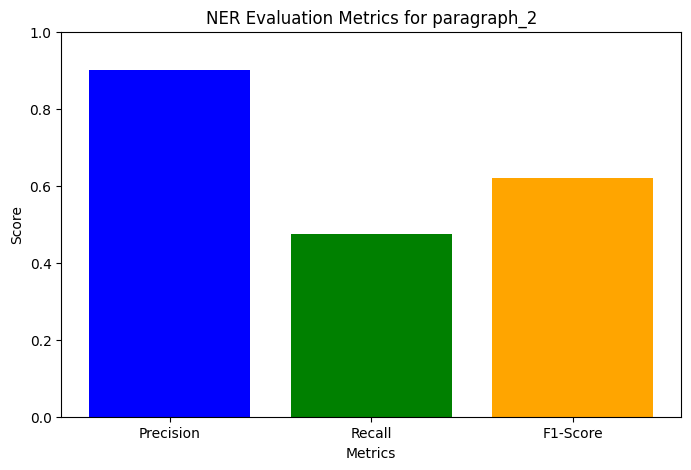

In [27]:
labels = ['Precision', 'Recall', 'F1-Score']
scores = [precision, recall, F1_score_p2]

plt.figure(figsize=(8, 5))
plt.bar(labels, scores, color=['blue', 'green', 'orange'])
plt.ylim(0, 1)  # Setting y-axis limit from 0 to 1 for better visualization of scores
plt.title('NER Evaluation Metrics for paragraph_2')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.show()

# Passage 3

In [28]:
passage_3 = "Snaking through heavy crowds on the Riva degli Schiavoni, Langdon, Sienna, and Ferris hugged the water’s edge, making their way into St. Mark’s Square and arriving at its southernmost border, the edge where the piazza met the sea. Here the throng of tourists was almost impenetrable, creating a claustrophobic crush around Langdon as the multitudes gravitated over to photograph the two massive columns that stood here, framing the square. The official gateway to the city, Langdon thought ironically, knowing the spot had also been used for public executions until as late as the eighteenth century. Atop one of the gateway’s columns, he could see a bizarre statue of St. Theodore, posing proudly with his slain dragon of legendary repute, which always looked to Langdon much more like a crocodile. Atop the second column stood the ubiquitous symbol of Venice—the winged lion. Throughout the city, the winged lion could be seen with his paw resting proudly on an open book bearing the Latin inscription Pax tibi Marce, evangelista meus (May Peace Be with You, Mark, My Evangelist). According to legend, these words were spoken by an angel upon St. Mark’s arrival in Venice, along with the prediction that his body would one day rest here. This apocryphal legend was later used by Venetians to justify plundering St. Mark’s bones from Alexandria for reburial in St. Mark’s Basilica. To this day, the winged lion endures as the city’s symbol and is visible at nearly every turn. Langdon motioned to his right, past the columns, across St. Mark’s Square. “If we get separated, meet at the front door of the basilica.” The others agreed and quickly began skirting the edges of the crowd and following the western wall of the Doge’s Palace into the square. Despite the laws forbidding feeding them, the celebrated pigeons of Venice appeared to be alive and well, some pecking about at the feet of the crowds and others swooping into the outdoor cafés to pillage unprotected bread baskets and torment the tuxedoed waiters. This grand piazza, unlike most in Europe, was shaped not in the form of a square but rather in that of the letter L. The shorter leg—known as the piazzetta—connected the ocean to St. Mark’s Basilica. Up ahead, the square took a ninety-degree left turn into its larger leg, which ran from the basilica toward the Museo Correr. Strangely, rather than being rectilinear, the square was an irregular trapezoid, narrowing substantially at one end. This fun-house-type illusion made the piazza look far longer than it was, an effect that was accentuated by the grid of tiles whose patterns outlined the original stalls of fifteenth-century street merchants. As Langdon continued on toward the elbow of the square, he could see, directly ahead in the distance, the shimmering blue glass dial of the St. Mark’s Clock Tower—the same astronomical clock through which James Bond had thrown a villain in the film Moonraker. It was not until this moment, as he entered the sheltered square, that Langdon could fully appreciate this city’s most unique offering: sound. With virtually no cars or motorized vehicles of any kind, Venice enjoyed a blissful absence of the usual civic traffic, subways, and sirens, leaving sonic space for the distinctly unmechanical tapestry of human voices, cooing pigeons, and lilting violins serenading patrons at the outdoor cafés. Venice sounded like no other metropolitan center in the world. As the late-afternoon sun streamed into St. Mark’s from the west, casting long shadows across the tiled square, Langdon glanced up at the towering spire of the campanile, which rose high over the square and dominated the ancient Venetian skyline. The upper loggia of the tower was packed with hundreds of people. Even the mere thought of being up there made him shiver, and he put his head back down and continued through the sea of humanity. Sienna could easily have kept up with Langdon, but Ferris was lagging behind, and Sienna had decided to split the difference in order to keep both men in sight. Now, however, as the distance between them grew more pronounced, she looked back impatiently. Ferris pointed to his chest, indicating he was winded, and motioned for her to go on ahead. Sienna complied, moving quickly after Langdon and losing sight of Ferris. Yet as she wove her way through the crowd, a nagging feeling held her back—the strange suspicion that Ferris was lagging behind intentionally … as if he were trying to put distance between them. Having learned long ago to trust her instincts, Sienna ducked into an alcove and looked out from the shadows, scanning the crowd behind her and looking for Ferris. Where did he go?! It was as if he were no longer even trying to follow them. Sienna studied the faces in the crowd, and finally she saw him. To her surprise, Ferris had stopped and was crouched low, typing into his phone. The same phone he told me had a dead battery. A visceral fear gripped her, and again she knew she should trust it. He lied to me on the train. As Sienna watched him, she tried to imagine what he was doing. Secretly texting someone? Researching behind her back? Trying to solve the mystery of Zobrist’s poem before Langdon and Sienna could do so? Whatever his rationale, he had blatantly lied to her. I can’t trust him. Sienna wondered if she should storm over and confront him, but she quickly decided to slip back into the crowd before he spotted her. She headed again toward the basilica, searching for Langdon. I’ve got to warn him not to reveal anything else to Ferris. She was only fifty yards from the basilica when she felt a strong hand tugging on her sweater from behind. She spun around and found herself face-to-face with Ferris. The man with the rash was panting heavily, clearly having dashed through the mob to catch up with her. There was a frantic quality about him that Sienna hadn’t seen before. “Sorry,” he said, barely able to breathe. “I got lost in the crowd.” The instant Sienna looked in his eyes, she knew. He’s hiding something. When Langdon arrived in front of St. Mark’s Basilica, he was surprised to discover that his two companions were no longer behind him. Also of surprise to Langdon was the absence of a line of tourists waiting to enter the church. Then again, Langdon realized, this was late afternoon in Venice, the hour when most tourists—their energy flagging from heavy lunches of pasta and wine—decided to stroll the piazzas or sip coffee rather than trying to absorb any more history. Assuming that Sienna and Ferris would be arriving at any moment, Langdon turned his eyes to the entrance of the basilica before him. Sometimes accused of offering “an embarrassing surfeit of ingress,” the building’s lower facade was almost entirely taken up by a phalanx of five recessed entrances whose clustered columns, vaulted archways, and gaping bronze doors arguably made the building, if nothing else, eminently welcoming. One of Europe’s finest specimens of Byzantine architecture, St. Mark’s had a decidedly soft and whimsical appearance. In contrast to the austere gray towers of Notre-Dame or Chartres, St. Mark’s seemed imposing and yet, somehow, far more down-to-earth. Wider than it was tall, the church was topped by five bulging whitewashed domes that exuded an airy, almost festive appearance, causing more than a few of the guidebooks to compare St. Mark’s to a meringue-topped wedding cake. High atop the central peak of the church, a slender statue of St. Mark gazed down into the square that bore his name. His feet rested atop a crested arch that was painted midnight blue and dotted with golden stars. Against this colorful backdrop, the golden winged lion of Venice stood as the shimmering mascot of the city. It was beneath the golden lion, however, that St. Mark’s displayed one of its most famous treasures—four mammoth copper stallions—which at the moment were glinting in the afternoon sun. The Horses of St. Mark’s. Poised as if prepared to leap down at any moment into the square, these four priceless stallions—like so many treasures here in Venice—had been pillaged from Constantinople during the Crusades. Another similarly looted work of art was on display beneath the horses at the southwest corner of the church—a purple porphyry carving known as The Tetrarchs. The statue was well known for its missing foot, broken off while it was being plundered from Constantinople in the thirteenth century. Miraculously, in the 1960s, the foot was unearthed in Istanbul. Venice petitioned for the missing piece of statue, but the Turkish authorities replied with a simple message: You stole the statue—we’re keeping our foot. “Mister, you buy?” a woman’s voice said, drawing Langdon’s gaze downward. A heavyset Gypsy woman was holding up a tall pole on which hung a collection of Venetian masks. Most were in the popular volto intero style—the stylized full-faced, white masks often worn by women during Carnevale. Her collection also contained some playful half-faced Colombina masks, a few triangle-chinned bautas, and a strapless Moretta. Despite her colorful offerings, though, it was a single, grayish-black mask at the top of the pole that seized Langdon’s attention, its menacing dead eyes seeming to stare directly down at him over a long, beaked nose. The plague doctor. Langdon averted his eyes, needing no reminder of what he was doing here in Venice. “You buy?” the Gypsy repeated. Langdon smiled weakly and shook his head. “Sono molto belle, ma no, grazie.” As the woman departed, Langdon’s gaze followed the ominous plague mask as it bobbed above the crowd. He sighed heavily and raised his eyes back to the four copper stallions on the second-floor balcony. In a flash, it hit him. Langdon felt a sudden rush of elements crashing together—Horses of St. Mark’s, Venetian masks, and pillaged treasures from Constantinople. “My God,” he whispered. That’s it!"

In [29]:
p3_NER = set()
for sent in nltk.sent_tokenize(passage_3):
    for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
        if hasattr(chunk, 'label'):
            p3_NER.add((' '.join(c[0] for c in chunk), chunk.label()))

p3_NER

{('Alexandria', 'GPE'),
 ('Basilica', 'PERSON'),
 ('Byzantine', 'GPE'),
 ('Carnevale', 'GPE'),
 ('Chartres', 'PERSON'),
 ('Clock', 'PERSON'),
 ('Colombina', 'GPE'),
 ('Constantinople', 'GSP'),
 ('Constantinople', 'ORGANIZATION'),
 ('Doge', 'ORGANIZATION'),
 ('Europe', 'GPE'),
 ('Ferris', 'GPE'),
 ('Ferris', 'PERSON'),
 ('Gypsy', 'ORGANIZATION'),
 ('Gypsy', 'PERSON'),
 ('Horses', 'ORGANIZATION'),
 ('Istanbul', 'GPE'),
 ('James Bond', 'PERSON'),
 ('Langdon', 'PERSON'),
 ('Latin', 'GPE'),
 ('Marce', 'PERSON'),
 ('Mark', 'PERSON'),
 ('Moonraker', 'PERSON'),
 ('Museo Correr', 'ORGANIZATION'),
 ('My Evangelist', 'PERSON'),
 ('Palace', 'GPE'),
 ('Riva', 'ORGANIZATION'),
 ('Schiavoni', 'PERSON'),
 ('Sienna', 'GPE'),
 ('Sienna', 'PERSON'),
 ('Sono', 'PERSON'),
 ('Sorry', 'PERSON'),
 ('Square', 'PERSON'),
 ('St.', 'GPE'),
 ('St. Mark', 'ORGANIZATION'),
 ('St. Mark', 'PERSON'),
 ('Tetrarchs', 'ORGANIZATION'),
 ('Turkish', 'GPE'),
 ('Venetian', 'GPE'),
 ('Venice', 'GPE'),
 ('Venice', 'PERSON'),
 (

In [30]:
prediction_p3 = dict()
for x in p3_NER:
    prediction_p3.setdefault(x[0], []).append(x[1])

In [31]:
Hand_Marked_p3 = [
    ('Langdon', 'PERSON'),
    ('Sienna', 'PERSON'),
    ('Ferris', 'PERSON'),
    ('St. Theodore', 'PERSON'),
    ('Mark', 'PERSON'),
    ('Doge’s Palace', 'GPE'),
    ('Venice', 'GPE'),
    ('St. Mark’s Basilica', 'GPE'),
    ('Museo Correr', 'GPE'),
    ('Colombina', 'GPE'),
    ('St. Mark ', 'ORGANIZATION'),
    ('James Bond', 'PERSON'),
    ('Zobrist', 'PERSON'),
    ('Notre-Dame', 'GPE'),
    ('Chartres', 'GPE'),
    ('Istanbul', 'GPE'),
    ('James Bond', 'PERSON'),
    ('Constantinople', 'GPE'),
    ('St. Mark’s Square', 'GPE'),
    ('Gypsy', 'ORGANIZATION'),
    ('Carnevale', 'EVENT'),
    ('Turkish', 'GPE')

]

In [32]:
actual_p3 = dict()
for x in Hand_Marked_p3:
    actual_p3.setdefault(x[0], x[1])
# print(actual)

In [33]:
tp, tn, fp, fn = 0, 0, 0, 0

In [34]:
for entity, type_ in actual_p3.items():
    if entity in prediction_p3:
        if type_ in prediction_p3[entity]:
            tp += 1
            fp += len(prediction_p3[entity]) - 1
        else:
            fn += 1
    else:
        fn += 1

In [35]:
print("TP: ", tp, " TN: ", tn, " FP: ", fp, " FN: ", fn)

TP:  10  TN:  0  FP:  4  FN:  11


In [36]:
F1_score_p3 = (2 * tp) / ((2 * tp) + fp + fn)
accuracy = (tp + tn) / (tp + tn + fn + fp)
print("Accuracy: {0:.2f}".format(accuracy))
print("F1 Score: {0:.2f}".format(F1_score_p3))

Accuracy: 0.40
F1 Score: 0.57


In [37]:
precision = tp / (tp + fp)
recall = tp / (tp + fn)


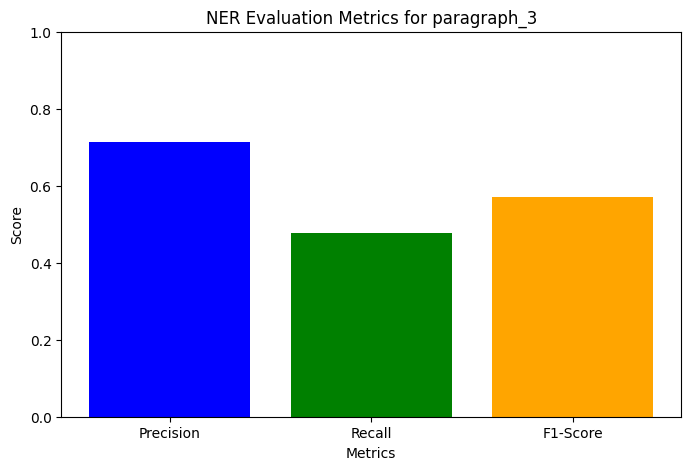

In [38]:
labels = ['Precision', 'Recall', 'F1-Score']
scores = [precision, recall, F1_score_p3]

plt.figure(figsize=(8, 5))
plt.bar(labels, scores, color=['blue', 'green', 'orange'])
plt.ylim(0, 1)  # Setting y-axis limit from 0 to 1 for better visualization of scores
plt.title('NER Evaluation Metrics for paragraph_3')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.show()

# Visualization

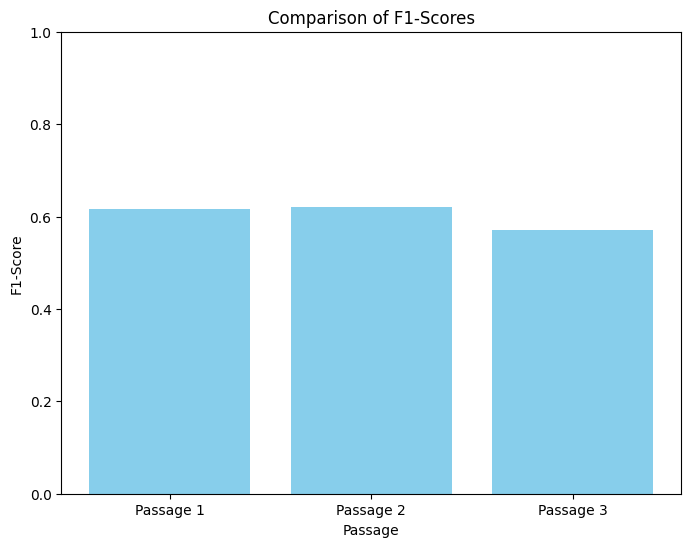

In [39]:

f1_scores = [F1_score_p1, F1_score_p2, F1_score_p3]  # Replace these scores with your actual scores

models = ['Passage 1', 'Passage 2', 'Passage 3']

plt.figure(figsize=(8, 6))
plt.bar(models, f1_scores, color='skyblue')
plt.ylim(0, 1)  # Set y-axis limit for better visualization of scores
plt.title('Comparison of F1-Scores')
plt.xlabel('Passage')
plt.ylabel('F1-Score')
plt.show()


# PART 2

In [40]:
# Split the book into chapters based on chapter headers
chapters = []
current_chapter = ""
for line in text.split('\n'):
    if line.startswith("Chapter") or line.startswith("CHAPTER"):
        if current_chapter:
            chapters.append(current_chapter.strip())
        current_chapter = line + "\n"
    else:
        current_chapter += line + "\n"

In [41]:
if current_chapter:
    chapters.append(current_chapter.strip())

In [42]:
for i, chapter in enumerate(chapters, 1):
    print(f"Chapter {i}:\n{chapter}\n")

Chapter 1:
About the Book
‘Seek and ye shall find.’
With these words echoing in his head, eminent Harvard symbologist Robert Langdon
awakes in a hospital bed with no recollection of where he is or how he got there. Nor can
he explain the origin of the macabre object that is found hidden in his belongings.
A threat to his life will propel him and a young doctor, Sienna Brooks, into a breakneck
chase across the city of Florence. Only Langdon’s knowledge of hidden passageways and
ancient secrets that lie behind its historic facade can save them from the clutches of their
unknown pursuers.
With only a few lines from Dante’s dark and epic masterpiece, 
The Inferno
, to guide
them, they must decipher a sequence of codes buried deep within some of the most
celebrated artefacts of the Renaissance – sculptures, paintings, buildings – to find the
answers to a puzzle which may, or may not, help them save the world from a terrifying
threat…
Set against an extraordinary landscape inspired by one of

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import numpy as np


In [44]:
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

In [45]:
# Compute TF-IDF vectors for each chapter
tfidf_vectors = tfidf_vectorizer.fit_transform(chapters)


In [46]:
# Calculate cosine similarity between TF-IDF vectors
similarity_scores = cosine_similarity(tfidf_vectors)

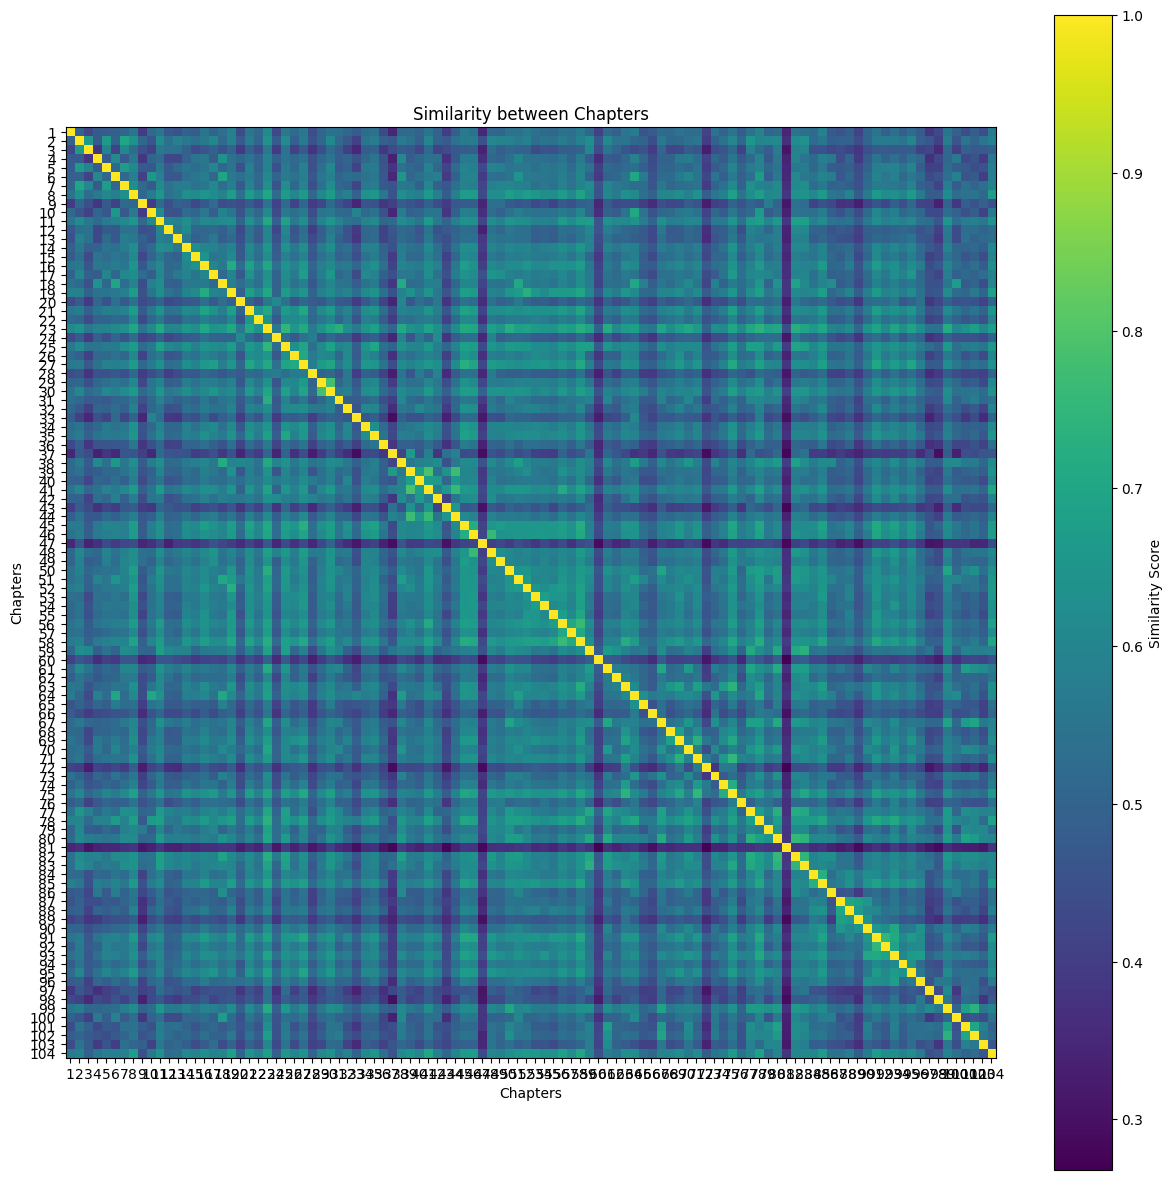

In [53]:
# Visualize similarity scores as a gradient table
plt.figure(figsize=(15, 15))
plt.imshow(similarity_scores, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Similarity Score')
plt.title('Similarity between Chapters')
plt.xlabel('Chapters')
plt.ylabel('Chapters')
plt.xticks(np.arange(len(chapters)), np.arange(1, len(chapters) + 1))
plt.yticks(np.arange(len(chapters)), np.arange(1, len(chapters) + 1))
plt.savefig('similarity_table.png', bbox_inches='tight')
plt.show()